# ** Rossmann Drug Store Sales**

**statistical Analysis and Prediction**

## Key Findings:
1. Correlation between:
* strong positiv between Sales and Nr. of Customers
* slight positiv betweene running a Promo (Promo1) and Nr. of Customers
* slightly negative Correlation between Promo2 and Sales and Customers

2. **Time-Series Analysis**
* highest Sales on Monday (independent of running a Promo)
* Spikes around Christmas

3. **Stationarity**:
* stationarity proofen with Rolling Average and Dickey-Fuller Test


## Executive Summary:
Analyzing the Sales Data of all German Rossmann stores (drug store) from Jan 2013 to July 2015. Detect correlations of various features. Main positive correlations are Sales and Nr. of Customers as well as running a Promo.
Seasonality and Stationarity of Sales Data over time could be detected.
Highest sales around christmans(yearly) or on Monday (weekly basis) with no deviation in mean and standard deviation of Sales over time over the years so time-series are stationary
Adding googletrends and weather data as additional features for higher accuracy on predicting future sales with Facebook Prophet, statsmodels and pytorch/fastai Neural Network.
All predictions made are within a high accuracy rate.

# 1. Setup

## 1.1 Load Dependencies/ setup notebook

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

import os

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# prophet by Facebook
from fbprophet import Prophet

# AI with fastai2
from fastai.basics import *


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## so Colab doesn't go idle, add to console
# function KeepClicking(){
#    console.log("Clicking");
#    document.querySelector("colab-toolbar-button#connect").click()
# }setInterval(KeepClicking,60000)

## 1.2 Data Loading

In [ ]:
path_main = Path('/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann')
path_main

PosixPath('/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann')

In [ ]:
# for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/sample_submission.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/train.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/test.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/store.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/store_states.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/state_names.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/weather.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/googletrend.csv
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/lesson6-rossmann.ipynb
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/[fastai] Kaggle Rossmann Sales Predictionipynb
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/df_NoElapsed
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/2021.04.06 EDA & Fastai2 Rossmann Sales Data Prediction.ipynb
/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/train_df_notfull
/content/dr

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kaggle/rossmann/train.csv", 
                    parse_dates=True, low_memory=False, index_col='Date')

store = pd.read_csv(path_main/'store.csv', low_memory=False,)
# train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [ ]:
print(f'the total: {train.shape}')
# train.head()

the total: (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
print(f'data from : {train.index.min()} to {train.index.max()}')

data from : 2013-01-01 00:00:00 to 2015-07-31 00:00:00


In [ ]:
# Data extraction from datetime index
train["Day"] = train.index.day
train["Month"] = train.index.month
train["Year"] = train.index.year
train["WeekOfYear"] = train.index.weekofyear

train['SalesPerCustomer'] = train.Sales / train.Customers
# train.SalesPerCustomer.describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalesPerCustomer, dtype: float64

# 2. EDA

## 2.1 Sales Data Analysis

In [ ]:
# setup seaborn
sns.set(style = 'whitegrid')
sns.set_context('paper')
sns.set_palette('Blues')
# Viridis colorscale
c1 = '#440154FF'
c = '#39568CFF'
c2 = '#73D055FF'
c3 = '#1F968BFF'
c4 = '#FDE725FF' # basic color for plots



<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

### Exponential Cumulative Distribution Function

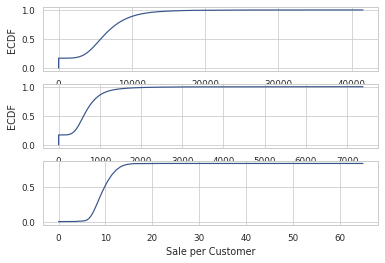

In [ ]:
# exponential cumulative distribution function


plt.figure(figsize = (12, 6))
plt.subplot(311)
cdf = ECDF(train.Sales)
plt.plot(cdf.x, cdf.y, label = 'statsmodels', color=c)
plt.xlabel('Sales'); plt.ylabel('ECDF')

plt.subplot(312)
cdf = ECDF(train.Customers)
plt.plot(cdf.x, cdf.y, label = 'statsmodels', color=c)
plt.xlabel('Customer'); plt.ylabel('ECDF')

plt.subplot(313)
cdf = ECDF(train['SalesPerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

In [ ]:
# First Plot: 20% of rows no Sales and second plot shows also 20% of time no Customers

### Missing Values


In [ ]:
train[(train.Open == 0) & (train.Sales ==0)].head()
print(f'numbers of data entries with no Sales and closed {train[(train.Open == 0) & (train.Sales ==0)].shape}')

numbers of data entries with no Sales and closed (172817, 13)


In [ ]:
# drop mising values to avoid bias in forecast

print('delete stores and days with no sales')

train  = train[(train.Open != 0) & (train.Sales != 0)]

print(f'length of new data entries {train.shape}')

delete stores and days with no sales
length of new data entries (844338, 13)


## 2.2 Store Data Analysis

In [ ]:
store.head()

AttributeError: ignored

- Store: a unique Id
- StoreType: 4 different store models: a, b, c, d
- Assortment: assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor
- CompetitionOpenSince[Month/Year]: 
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: "Feb,May,Aug,Nov" means each round starts in February, May, 
August, November of any given year for that store

In [ ]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# check missing values for each column, anomlies or reason why missing recognicable
# Competition Distance
store[pd.isnull(store.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
# 3 fill withmedian since no particular reason detectable why this happened. probably just error on input
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

In [ ]:
# 2. Promo2SinceWeek
_ = store[pd.isnull(store.Promo2SinceWeek)]
_.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [ ]:
# same as above, Promo2SinceWeek, CompetitionOpenSinceMonth and CompetitionOpenSinceYear
# replace with 0
store.fillna(0, inplace=True)

## 2.3 Join datasets

In [ ]:
train_store = pd.merge(train, store, how='inner', on="Store")
print(f'In total {train_store.shape} data entries')
train_store.head()

In total (844338, 22) data entries


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year,WeekOfYear,SalesPerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,31,7,2015,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,30,7,2015,31,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,29,7,2015,31,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,28,7,2015,31,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,27,7,2015,31,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


## 2.4 StoreType-Sales Correlations

In [ ]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [ ]:
train_store.groupby('StoreType')['Sales', 'Customers'].sum()

,Sales,Customers
StoreType,,
a,3165334859,363541431
b,159231395,31465616
c,783221426,92129705
d,1765392943,156904995


In [ ]:
train_store.groupby('StoreType')['SalesPerCustomer'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,8.846296,1.690913,3.635389,7.611945,8.631363,9.899438,29.877551
b,15560.0,5.133427,1.253988,2.749075,4.039561,4.987022,6.108760,9.203528
c,112968.0,8.626227,1.694325,3.382542,7.416985,8.424736,9.643063,64.957854
d,258768.0,11.277862,1.990706,4.881279,9.873309,11.194977,12.560328,57.614983


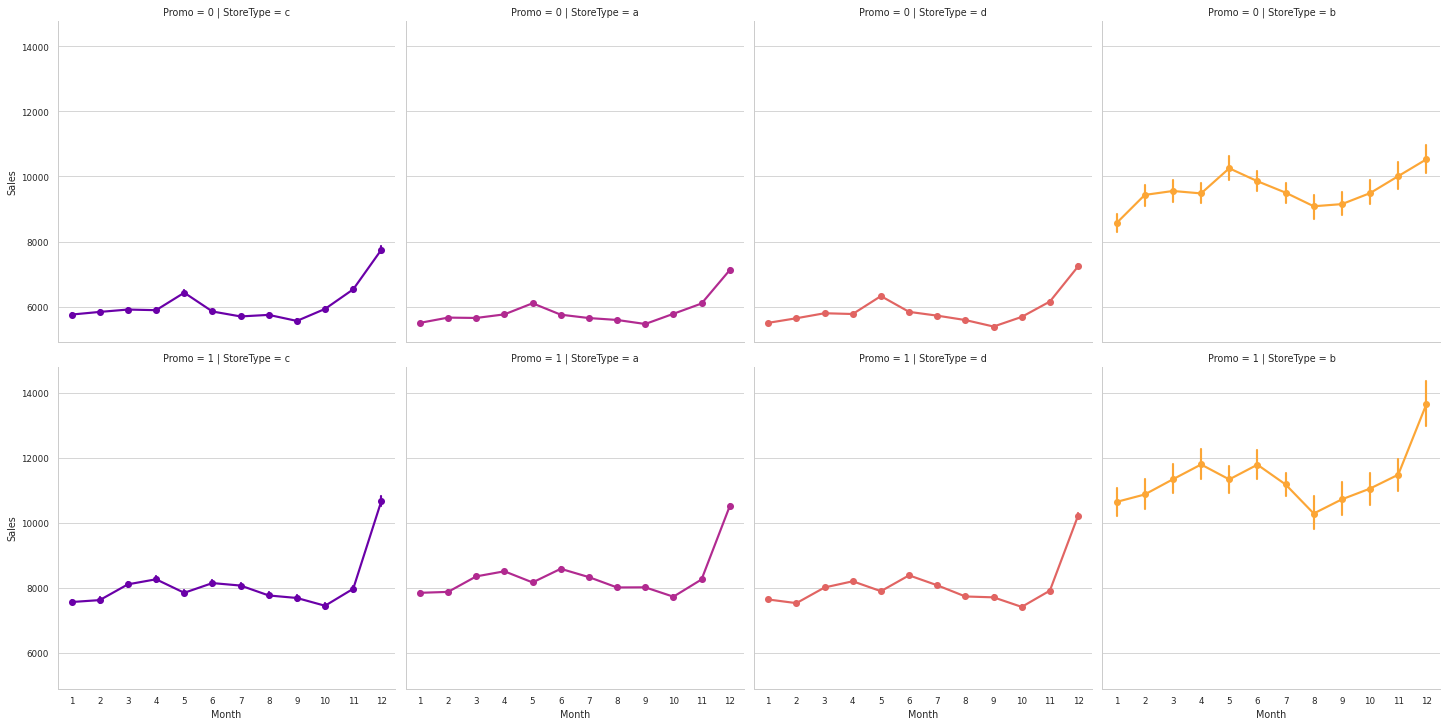

In [ ]:
sns.factorplot(data= train_store, x='Month', y='Sales',
               col = "StoreType",
               palette='plasma',
               hue='StoreType',
               row='Promo', color= c)

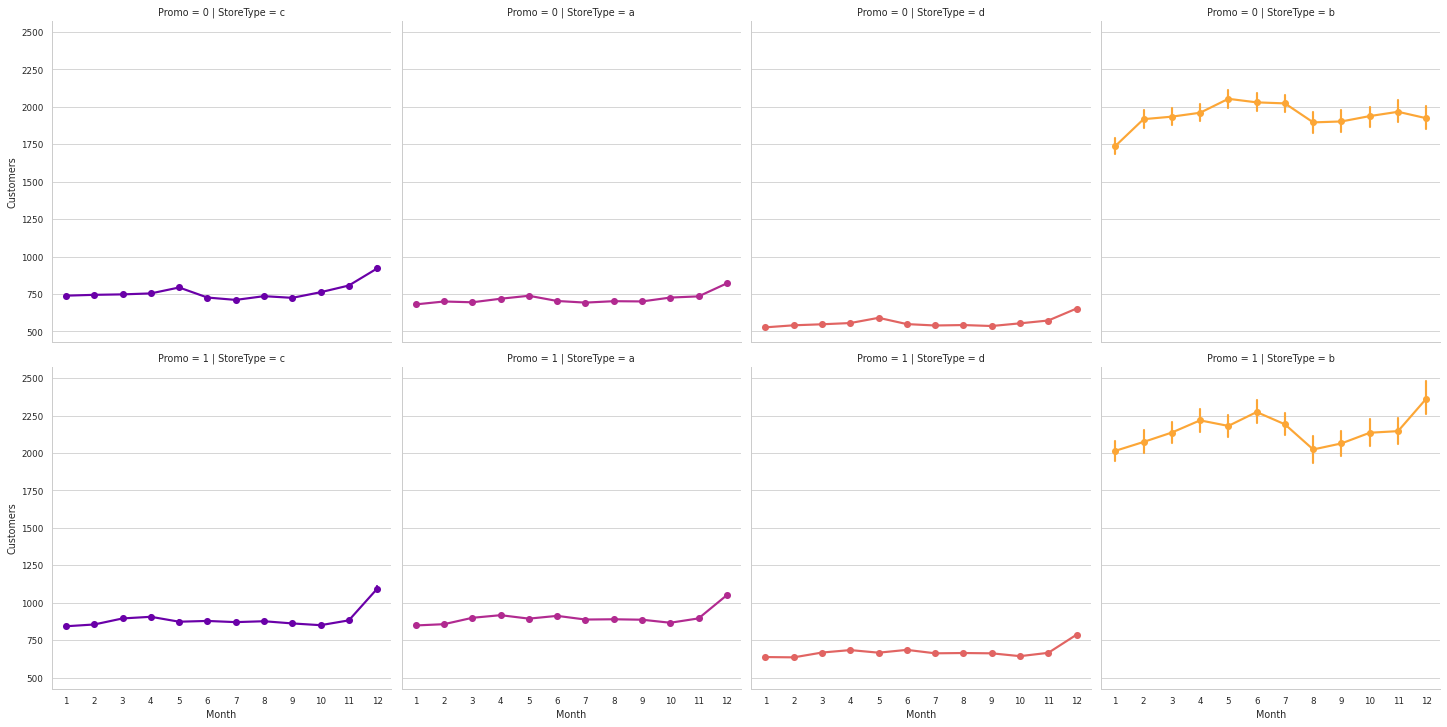

In [ ]:
sns.factorplot(data=train_store, x='Month', y="Customers",
               col="StoreType",
               palette= 'plasma',
               hue = 'StoreType',
               row="Promo",
               color=c)

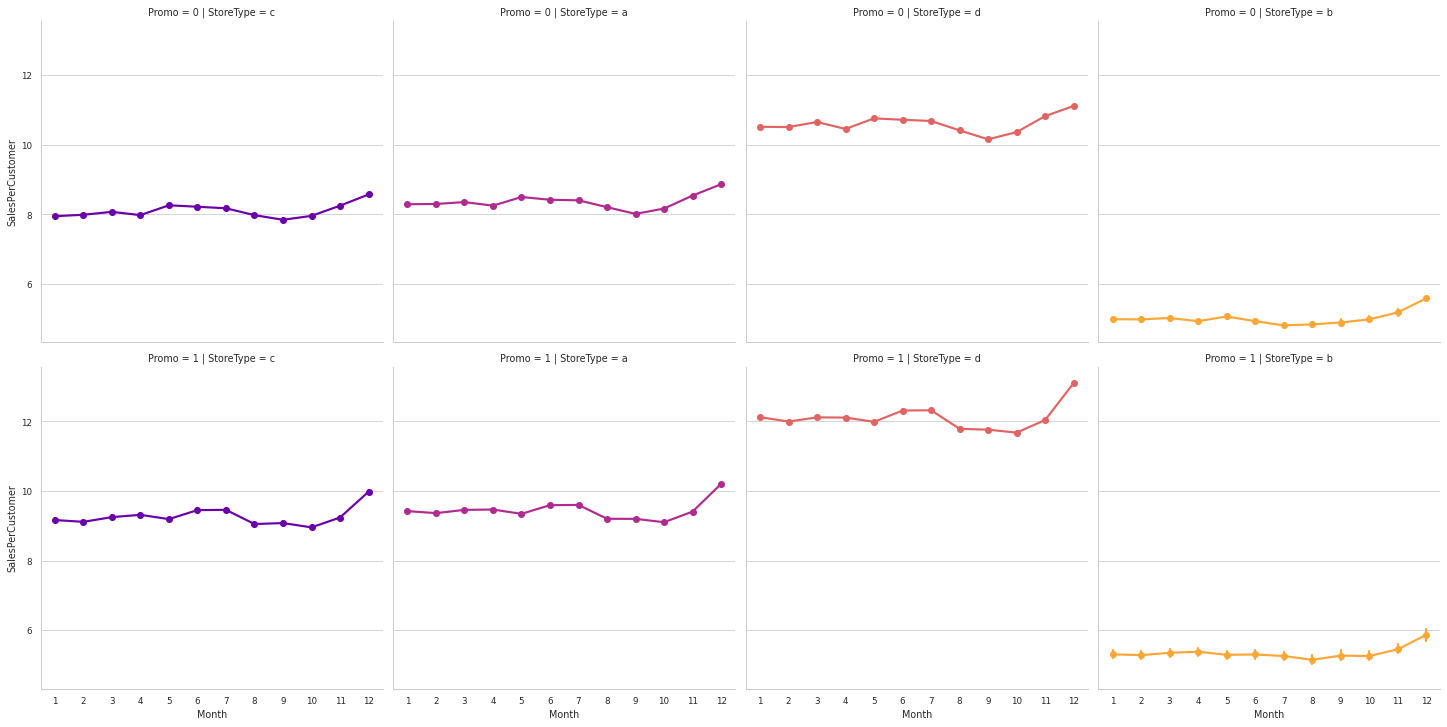

In [ ]:
sns.factorplot(data=train_store, x='Month', y='SalesPerCustomer',
               col='StoreType',
               palette = 'plasma',
               hue='StoreType',
               row='Promo',
               color=c)

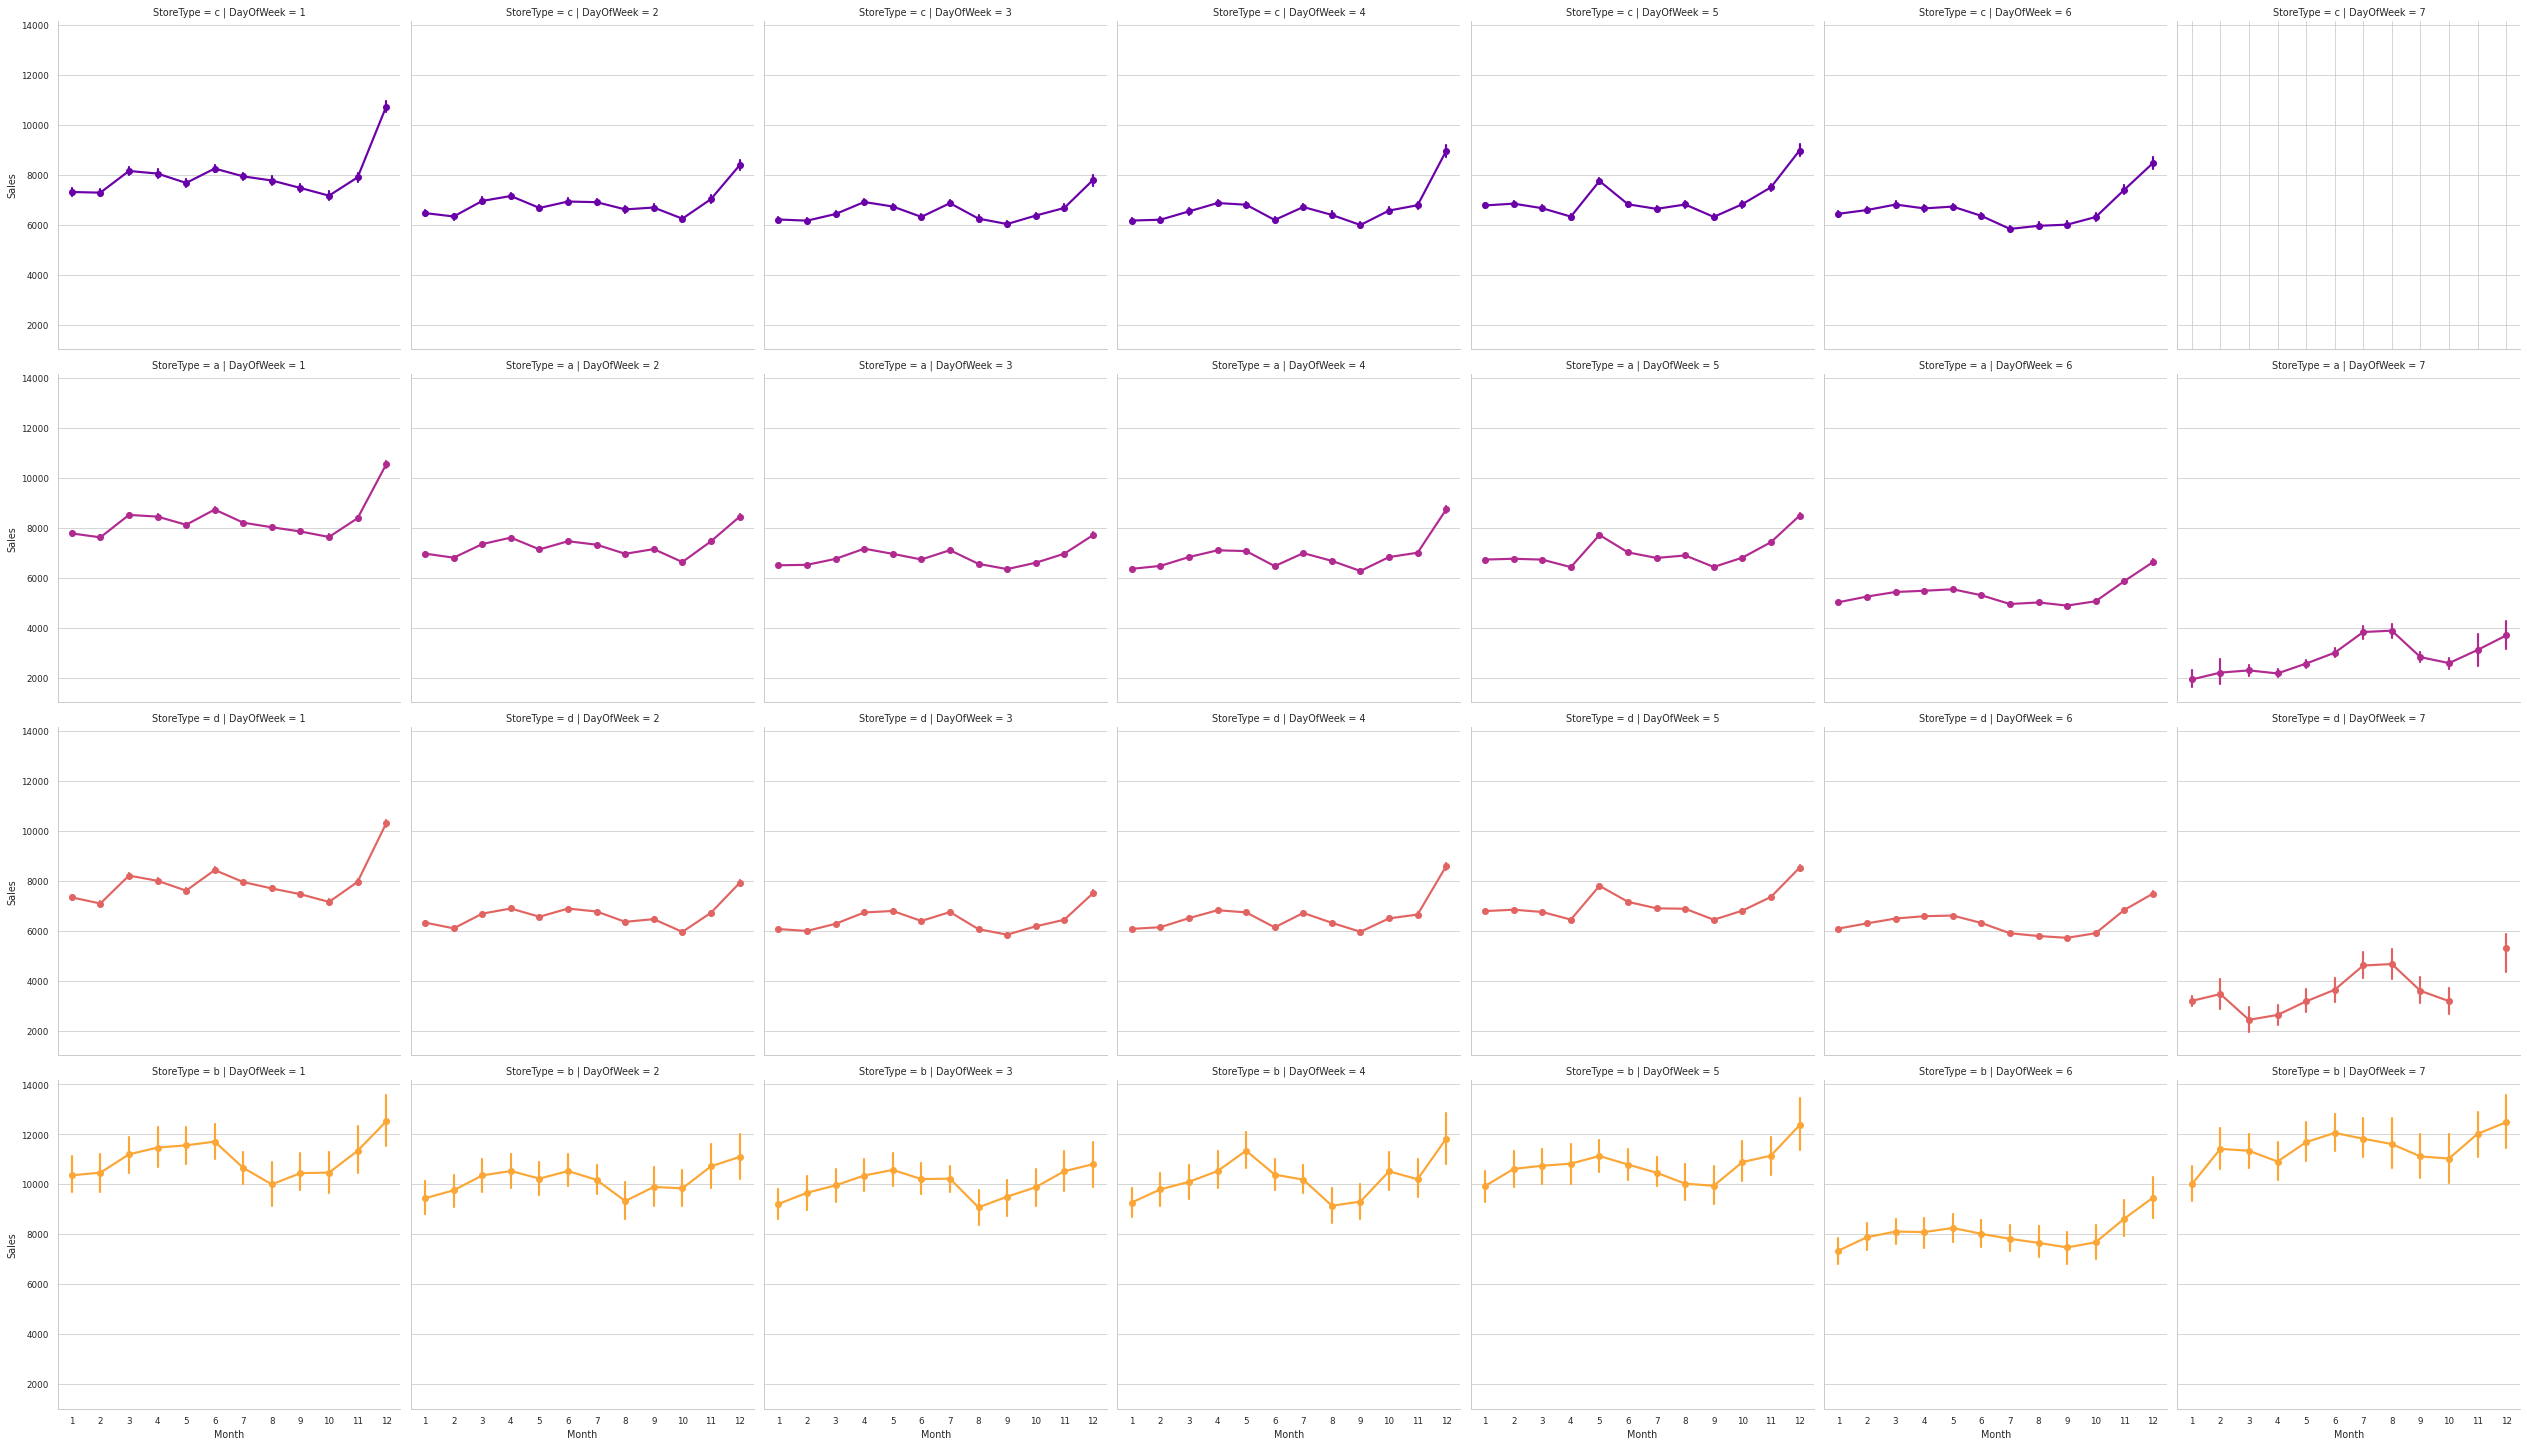

In [ ]:
sns.factorplot(data=train_store, x='Month', y='Sales',
               col='DayOfWeek',
               palette = 'plasma',
               hue='StoreType',
               row='StoreType',
               color=c)

In [ ]:
# stores open on sunday ?
train_store[(train_store.Open ==1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,  433,  453,  494,  512,  524,  530,  562,
        578,  676,  682,  732,  733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099])

## 2.5 Correlation Matrix

In [ ]:
import statsmodels.api as sm

In [ ]:

corr_matrix = train_store.corr()


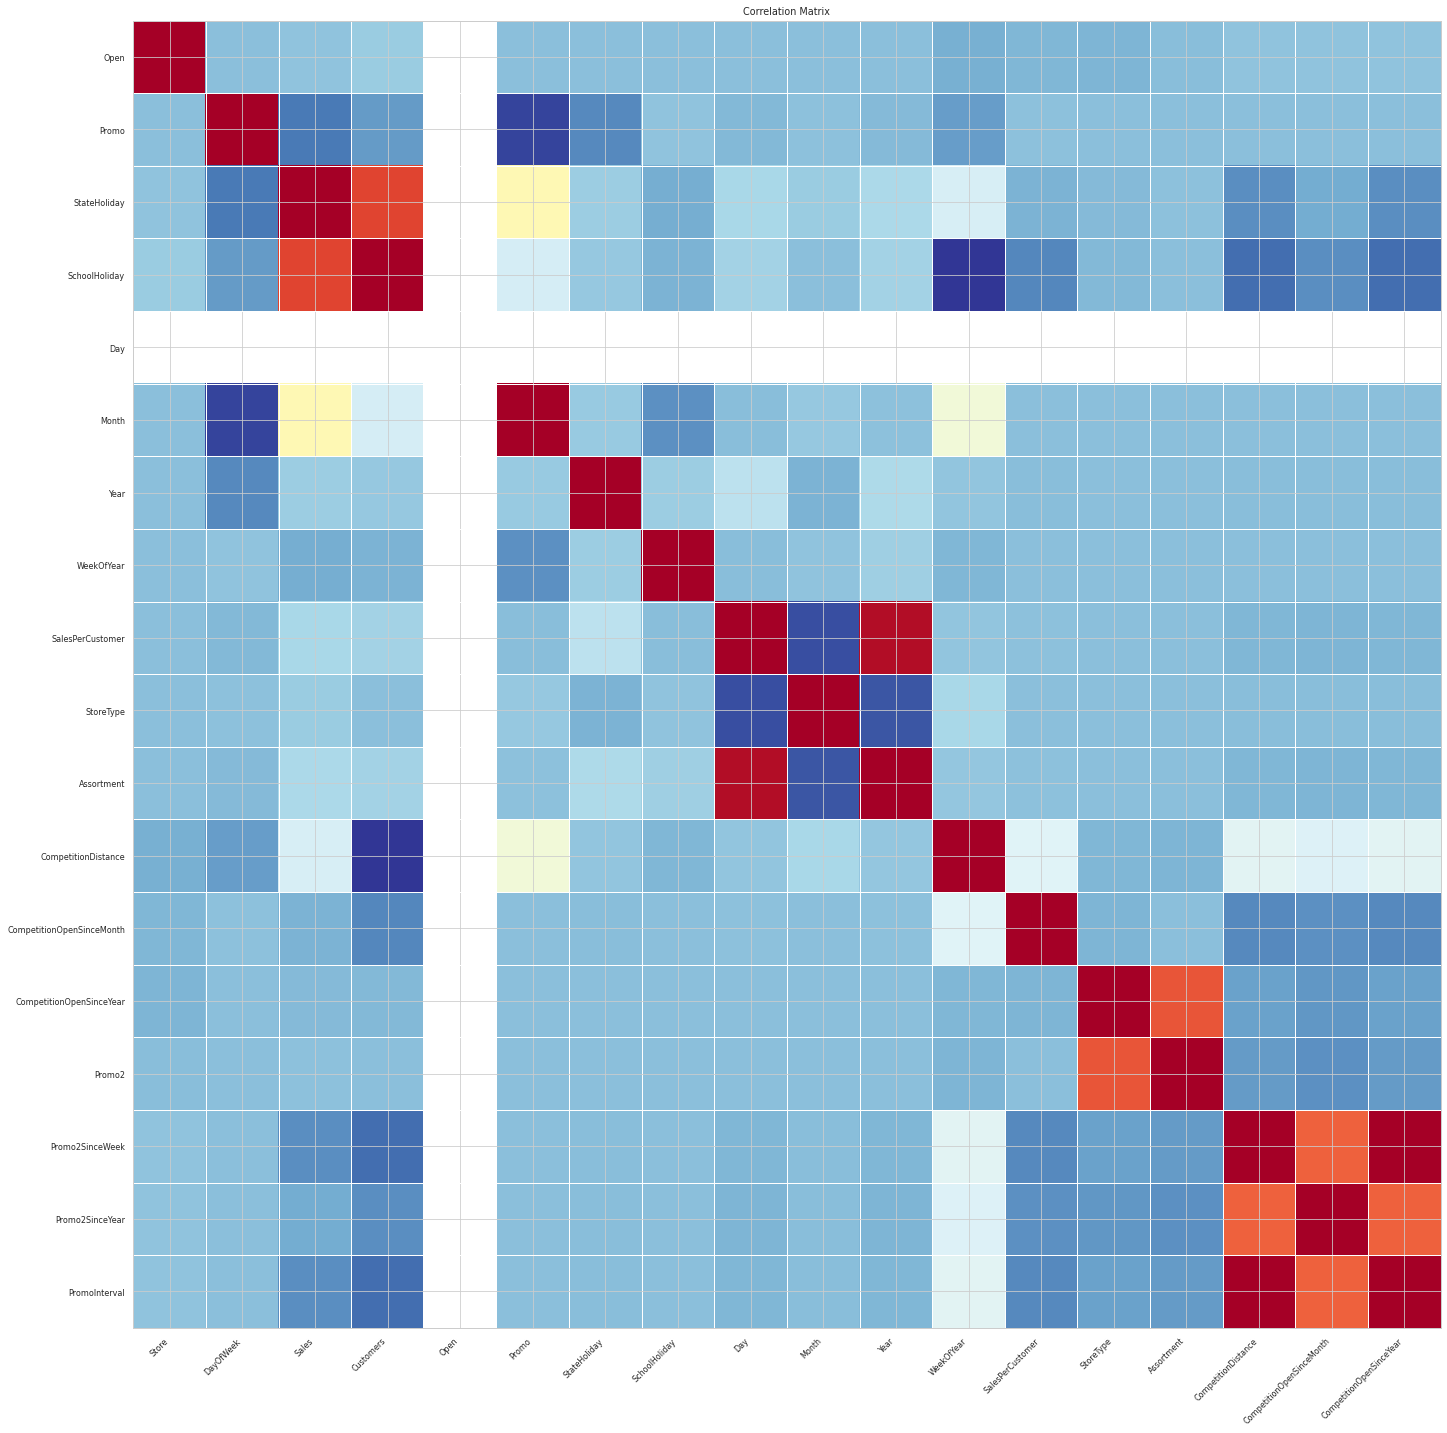

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sm.graphics.plot_corr(corr_matrix, xnames = train_store.columns, ax =ax)
plt.show()

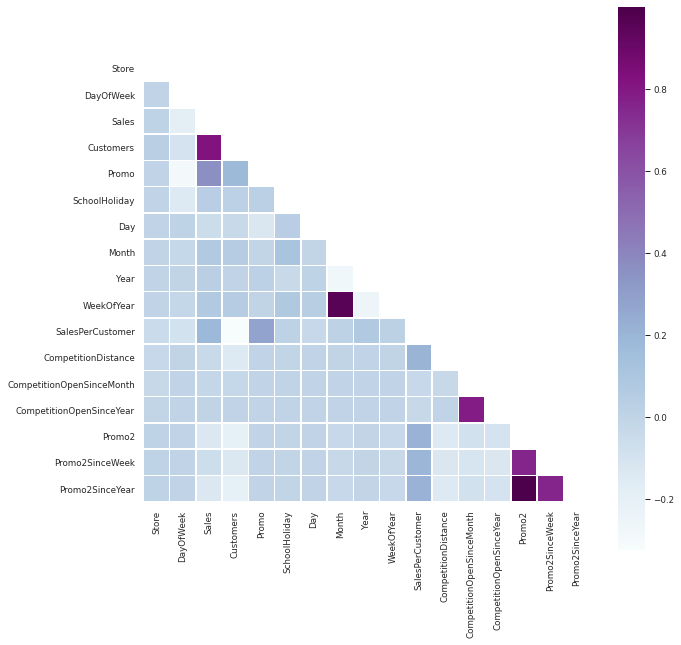

In [ ]:
correlation_ = train_store.drop('Open', axis=1).corr()

# Mask for visualization 
mask= np.zeros_like(correlation_, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot Graph 

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlation_, mask = mask, square=True, cmap = "BuPu", linewidths=.5, ax=ax)


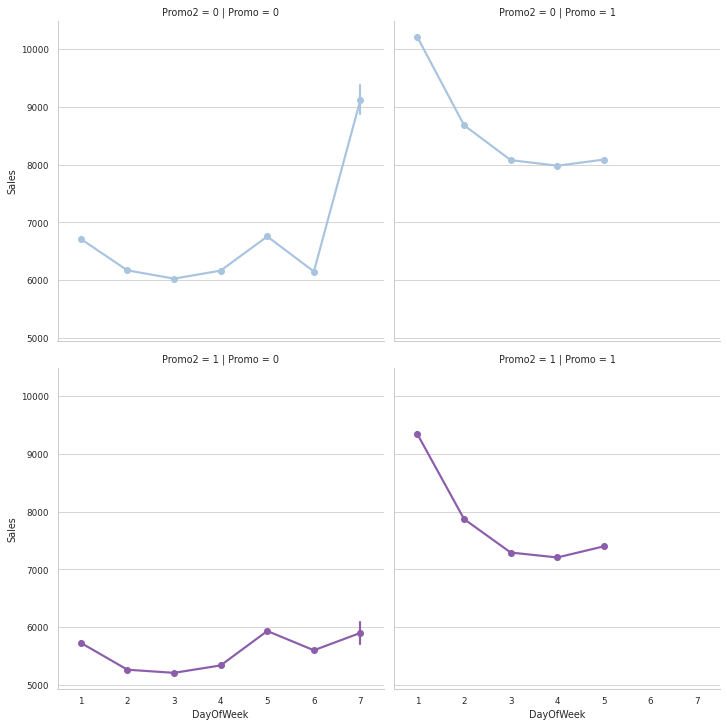

In [ ]:
sns.factorplot(data= train_store, x="DayOfWeek", y="Sales",
               col = 'Promo',
               palette = "BuPu",
               row= 'Promo2',
               hue= 'Promo2')

## 2.6 Profitability and Outlier detection

In [ ]:
##### Calculate performance metric
##################################

# sales per customer as profitability metric for stores
# only if store open and not null SpC
subs_1 = train_store[train_store.Open != 0]
subs = subs_1[subs_1.SalesPerCustomer.notnull()]

# median and mean-absolut-deviation per Store
median_SpC_perStore = subs.groupby('Store')['SalesPerCustomer'].median()
mad_SpC_perStore = subs.groupby('Store')['SalesPerCustomer'].mad()
CustomerPerStore = subs.groupby('Store')['Customers'].median()
mad_CustomerPerStore = subs.groupby('Store')['Customers'].mad()

print(len(CustomerPerStore), len(median_SpC_perStore))

1115 1115


In [ ]:

##### Plot Performance Metrics 
##############################

# sns.set(font_scale=1)
# fig, (axis1) = plt.subplots(1,1, sharex=True,figsize=(15,7))

# colors = np.random.rand(len(median_SpC_perStore))
# axis1.scatter(CustomerPerStore, median_SpC_perStore, 
#               s=mad_SpC_perStore*1000, c=colors, cmap='jet', alpha=0.5) # multiplying "size" by 1000 to make the extent visible
# axis1.set_xlabel('Customers')
# axis1.set_ylabel('Sales/Customers')
# axis1.set_title('Stores Sales/Customers ratio with size of circle related to mad-value')

# for store in median_SpC_perStore.index:
#     axis1.annotate(store, (CustomerPerStore[store], median_SpC_perStore[store]))

In [ ]:
# df_temp = pd.DateFrame({'Sales per Customer': median_SpC_perStore, 
#                         'Customers': CustomerPerStore, 
#                         "Sales per Customer MAD-values": mad_SpC_perStore, 
#                         "Store": median_SpC_perStore.index})


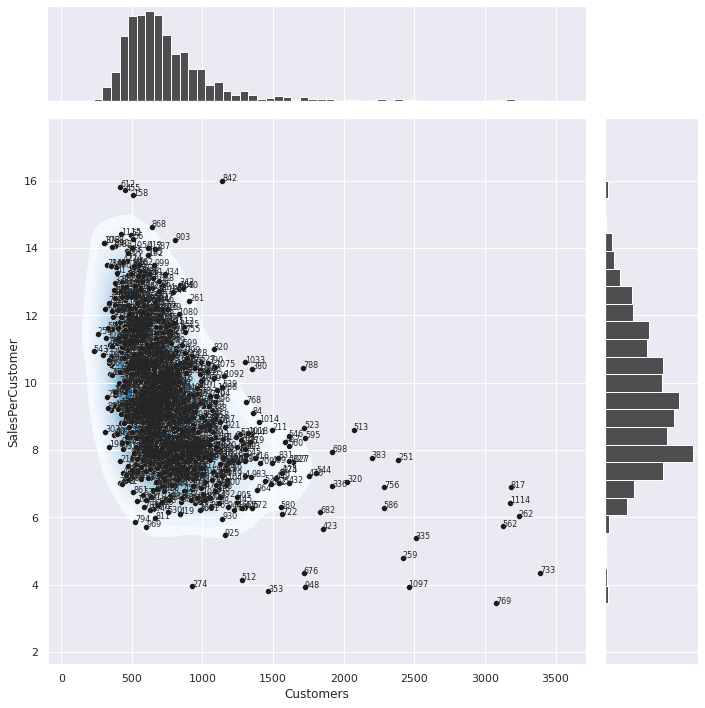

In [ ]:

##### Plot KDE
##############################
sns.set(font_scale=1)
ax1 = sns.jointplot(x=CustomerPerStore, y=median_SpC_perStore, 
                    # data = train_store,
                    color='k', size=10)
# add joint density plot
ax1.plot_joint(sns.kdeplot, zorder=0, n_levels= 30, 
               cmap='Blues', shade=True, shade_lowest = False)

# annotate every pint with StoreID
for store in median_SpC_perStore.index:
  ax1.ax_joint.annotate(store, (CustomerPerStore[store], median_SpC_perStore[store]),
                        fontsize= 8)

- Mark high/low performers via anamoly/outlier detection

expcted behaviour = stores in bluish field 

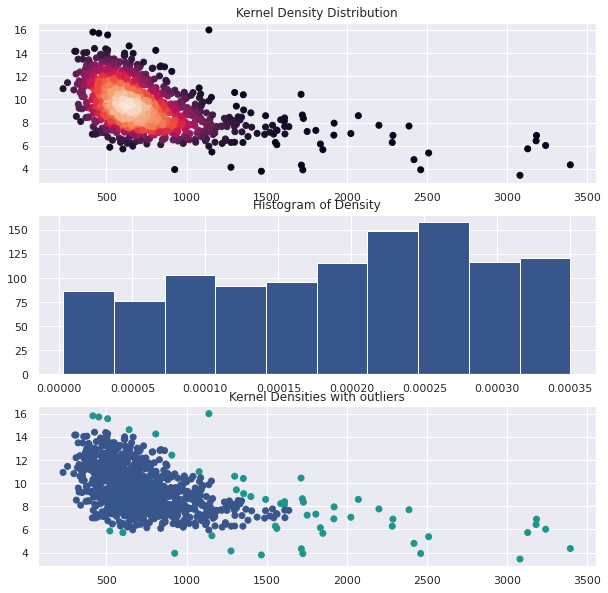

In [ ]:

##### Calculate kernel density
##############################

from scipy import stats

values = np.vstack([CustomerPerStore.ravel(), median_SpC_perStore.ravel()])

kernel_dens = stats.gaussian_kde(values)
density = kernel_dens(values)



######## Plot Outliers
######################
sns.set(font_scale=1)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))

x, y = values

ax1.scatter(x, y, c=density)
ax1.set_title('Kernel Density Distribution')

n, bins, patches = ax2.hist(density, 10, color=c)
ax2.set_title('Histogram of Density')

# define a threshold for outliers
thres = bins[1] - ((bins[1] - bins[0]) / 2)

color_outliers = {True: c3, False: c}
outlierStore = density < thres
# df_temp['Outlier'] = pd.Series(outlierStore, index= df_temp.index)

color_outliers = {True: c3, False: c}
ax3.scatter(x, y, c = [color_outliers[x <= thres] for x in density])
ax3.set_title('Kernel Densities with outliers')

plt.show()


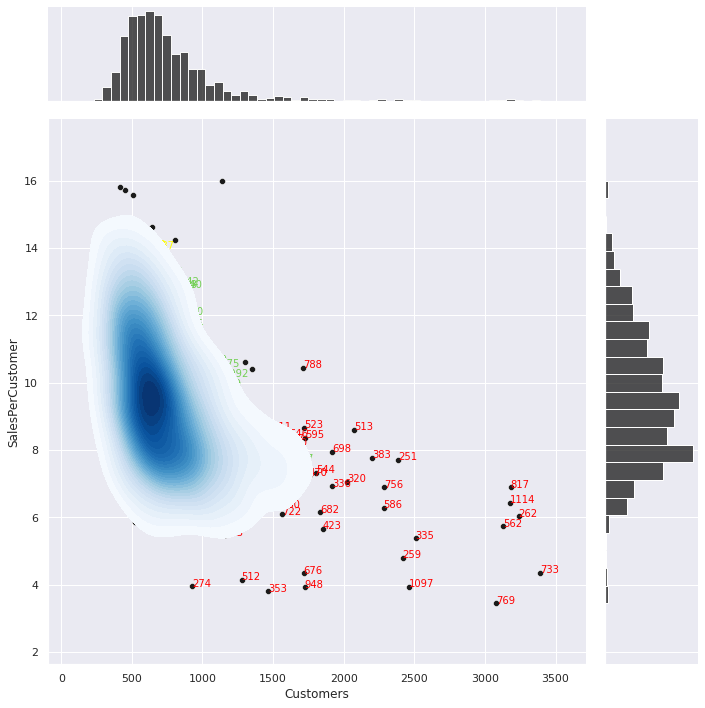

In [ ]:
sns.set(font_scale=1)
ax1 = sns.jointplot(x=CustomerPerStore, y = median_SpC_perStore, color='k',
                    size=10)
ax1.plot_joint(sns.kdeplot, zorder=10, n_levels=30, cmap='Blues', 
               shade=True, shade_lowest=False)

SpC_thres = [median_SpC_perStore.mean() - 2*median_SpC_perStore.std(),
             median_SpC_perStore.mean() + 2*median_SpC_perStore.std()
             ]
Cust_thres = [ CustomerPerStore.mean() - 2* CustomerPerStore.std(),
              CustomerPerStore.mean(0) + 2 * CustomerPerStore.std()]

outlier_annotation = ['n' for x in range(len(outlierStore))]

for i, store in enumerate(median_SpC_perStore.index):
  if (outlierStore[i]):
    if (median_SpC_perStore[store] <= SpC_thres[0] or 
        CustomerPerStore[store] >= Cust_thres[1]):
      outlier_annotation[i] = 'low_performer'
      ax1.ax_joint.annotate(store, (CustomerPerStore[store], median_SpC_perStore[store]), fontsize=10, color='red')
  elif (median_SpC_perStore[store] >= SpC_thres[1] or 
        CustomerPerStore[store] <= Cust_thres[0]):
        outlier_annotation[i] = 'high_performer'
        ax1.ax_joint.annotate(store, (CustomerPerStore[store], 
                                      median_SpC_perStore[store]), 
                              fontsize=10, color='yellow')
  else :
      # outlier_annotation[i] = 'average'
      ax1.ax_joint.annotate(store, 
                            (CustomerPerStore[store], median_SpC_perStore[store]), 
                            fontsize=10, color=c2)

In [ ]:
# #### add Performance Measure to Dataframe
# ###############################
# df['Annotation'] = pd.Series(outlier_annotation, index=df.index)
# #

# # performance measure /// 
# hp = df[df['Annotation'] == 'h']['Sa'].median()
# hc = df[df['Annotation'] == 'h']['Customers'].median()
# lp = df[df['Annotation'] == 'l']['Sales/Customers ratio'].median()
# lc = df[df['Annotation'] == 'l']['Customers'].median()
# nop = df[df['Annotation'] == 'n']['Sales/Customers ratio'].median()
# nc = df[df['Annotation'] == 'n']['Customers'].median()
# print('High performers:  ${} - sales/customer,  {} - customers'.format(hp, hc))
# print('Low performers:  ${} - sales/customer,  {} - customers'.format(lp, lc))
# print('Normal performers:  ${} - sales/customer,  {} - customers'.format(nop, nc))

# 3. Time-Series Analysis

we take following single Stores as "Representatives" for the corresponding StoreType class:
- Store number 2 for StoreType A
- Store number 85 for StoreType B,
- Store number 1 for StoreType C
- Store number 13 for StoreType D.



## 3.1 Seasonality

In [ ]:
# preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales'].sort_index(ascending = True) # solve the reverse order
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']


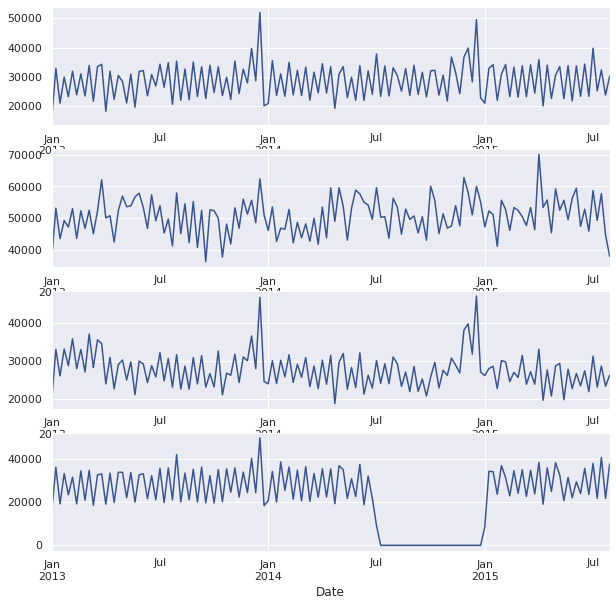

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,10))

sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

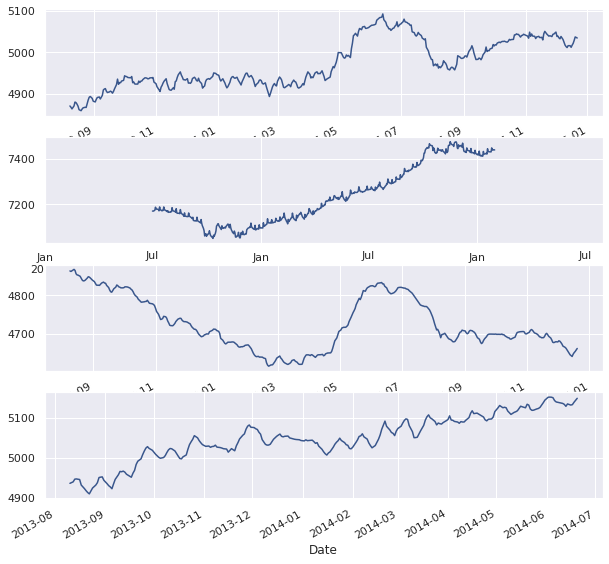

In [ ]:
# yearly trend

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,10))

#monthly

decomposition_a = seasonal_decompose(sales_a, model='additive', freq = 365)
decomposition_a.trend.plot(color=c, ax=ax1)

decomposition_b = seasonal_decompose(sales_b, model='additive', freq= 365,)
decomposition_b.trend.plot(color=c, ax=ax2)

decomposition_c = seasonal_decompose(sales_c, model = 'additive', freq = 365)
decomposition_c.trend.plot(color = c, ax = ax3)

decomposition_d = seasonal_decompose(sales_d, model = 'additive', freq = 365)
decomposition_d.trend.plot(color = c, ax = ax4)

## 2. Stationarity of Time-Series



In [ ]:

### Rolling overage (week) & Dickey-Fuller Test
# visual test to check it stationary over time
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determine rolling statestics 
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
    
    # plotting rolling statestics 
    plt.subplots(figsize = (16, 6))
    orginal = plt.plot(timeseries.resample('w').mean(), color=c, linewidth= 3, label='Orginal')
    roll_mean = plt.plot(roll_mean.resample('w').mean(), color=c2,linewidth= 3, label='Rolling Mean')
    roll_mean = plt.plot(roll_std.resample('w').mean(), color=c4 ,linewidth= 3, label='Rolling Std')
    
    plt.legend(loc='best')
    plt.show()
    
    # Performing Dickey-Fuller test 
    print('Result of Dickey-Fuller test:')
    result= adfuller(timeseries, autolag='AIC')
    
    print(f'ADF of Dickey-Fuller test is {result[0]}')
    print(f'P-Value of timeseries: {result[1]}')  
    print('Critical Values:')
    for key, value in result[4].items():
        print(key, value)

In [ ]:
# test for all 4 store types

test_stationarity(sales_a)
test_stationarity(sales_b)
test_stationarity(sales_c)
test_stationarity(sales_d)

# 4. Prophet- Future Predictions

- Facebooks Prophet for time-series forecasting




In [ ]:
df = pd.read_csv(path_main/'train.csv', low_memory=False)

df = df[(df.Sales != 0) & (df.Open != 0)]

sales = df[df.Store == 12].loc[:,['Sales', 'Date']]

sales.head()

,Sales,Date
11,8959,2015-07-31
1126,7996,2015-07-30
2241,9236,2015-07-29
3356,8822,2015-07-28
4471,10227,2015-07-27


In [ ]:
sales = sales.sort_index(ascending=False)
sales['Date'] = pd.DatetimeIndex(sales.Date)
sales.dtypes

sales = sales.rename(columns = {'Date': 'ds',
                                'Sales': 'y'})

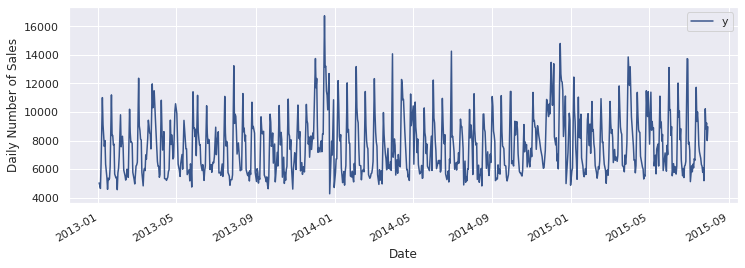

In [ ]:
ax = sales.set_index('ds').plot(figsize = (12, 4), color = c)
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [ ]:
state_dates = df[(df.StateHoliday == 'a') | (df.StateHoliday == 'b') & (df.StateHoliday == 'c')].loc[:, 'Date'].values
school_dates = df[df.SchoolHoliday == 1].loc[:, 'Date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

,holiday,ds
0,state_holiday,2015-06-04
1,state_holiday,2015-06-04
2,state_holiday,2015-06-04
3,state_holiday,2015-06-04
4,state_holiday,2015-06-04


In [ ]:
# create model and train

m = Prophet(holidays=holidays, growth='linear',
            interval_width=0.95, # set 
            )
m.fit(sales)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# create future df
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
786,2015-08-03
787,2015-08-04
788,2015-08-05
789,2015-08-06
790,2015-08-07


In [ ]:
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,school_holiday,school_holiday_lower,school_holiday_upper,state_holiday,state_holiday_lower,state_holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,6729.841593,3908.950366,10877.739135,6729.841593,6729.841593,640.312264,640.312264,640.312264,639.511945,639.511945,639.511945,639.511945,639.511945,639.511945,0.0,0.0,0.0,60.036316,60.036316,60.036316,-59.235997,-59.235997,-59.235997,0.0,0.0,0.0,7370.153858
1,2013-01-03,6730.698971,3735.900263,10233.738295,6730.698971,6730.698971,349.494782,349.494782,349.494782,639.511945,639.511945,639.511945,639.511945,639.511945,639.511945,0.0,0.0,0.0,-157.163812,-157.163812,-157.163812,-132.853351,-132.853351,-132.853351,0.0,0.0,0.0,7080.193752
2,2013-01-04,6731.556348,3523.738341,10327.737836,6731.556348,6731.556348,244.445282,244.445282,244.445282,639.511945,639.511945,639.511945,639.511945,639.511945,639.511945,0.0,0.0,0.0,-202.708160,-202.708160,-202.708160,-192.358504,-192.358504,-192.358504,0.0,0.0,0.0,6976.001629
3,2013-01-05,6732.413725,2785.960201,9425.082902,6732.413725,6732.413725,-456.511031,-456.511031,-456.511031,639.511945,639.511945,639.511945,639.511945,639.511945,639.511945,0.0,0.0,0.0,-857.859854,-857.859854,-857.859854,-238.163122,-238.163122,-238.163122,0.0,0.0,0.0,6275.902694
4,2013-01-07,6734.128479,5439.266518,11854.491338,6734.128479,6734.128479,2034.542512,2034.542512,2034.542512,639.511945,639.511945,639.511945,639.511945,639.511945,639.511945,0.0,0.0,0.0,1686.568403,1686.568403,1686.568403,-291.537836,-291.537836,-291.537836,0.0,0.0,0.0,8768.670991


In [ ]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat' })
fc.head()

,ds,yhat
0,2013-01-02,7370.153858
1,2013-01-03,7080.193752
2,2013-01-04,6976.001629
3,2013-01-05,6275.902694
4,2013-01-07,8768.670991


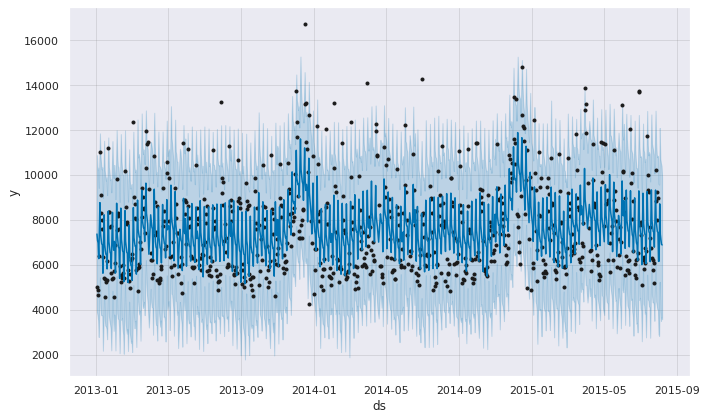

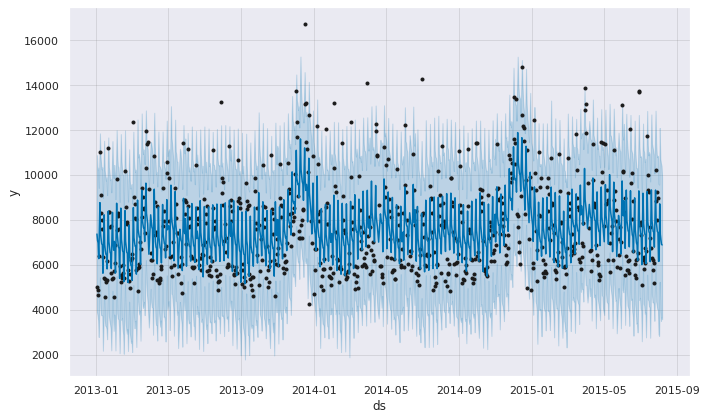

In [ ]:
m.plot(forecast)

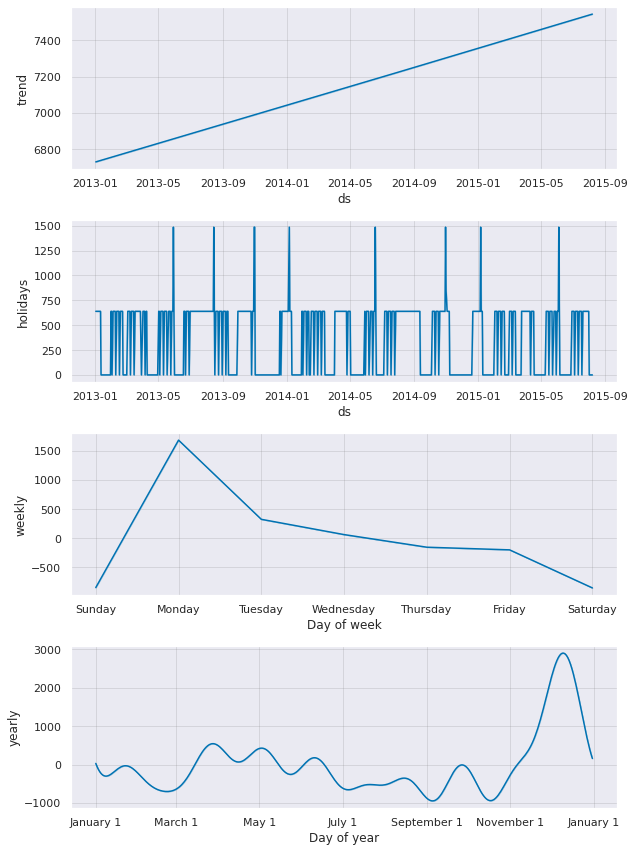

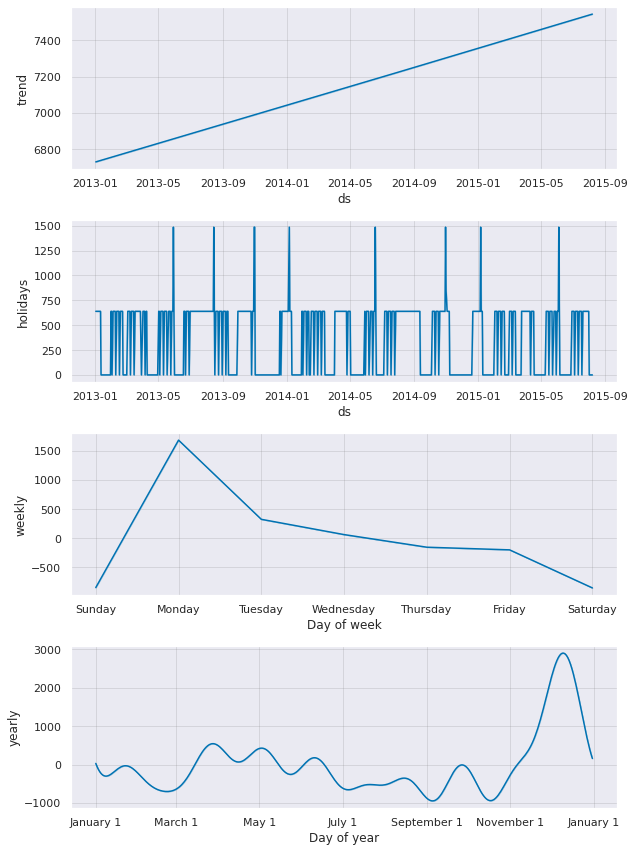

In [ ]:
m.plot_components(forecast)

In [ ]:
# help(Prophet)

In [ ]:
import plotly
import notebook
import ipywidgets 
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

# 5. Fastai - Nerual Net for Predictions

In [ ]:
PATH = path_main

In [ ]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']

In [ ]:
tables = [pd.read_csv(PATH/f'{fname}.csv', low_memory=False) for fname in table_names]
train, store, store_states, state_names, googletrend, weather, test = tables
# googletrend.tail()

In [ ]:
len(train), len(test)

(1017209, 41088)

## 5.1 Data Preparation




### Data Extraction & Merging tables

In [ ]:
# turn into booleans
train.StateHoliday = train.StateHoliday != '0'

test.StateHoliday = test.StateHoliday != '0'

In [ ]:
# custom merge function
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if(right_on is None):
        right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, suffixes=("", suffix))

In [ ]:
weather = join_df(weather, state_names, "file", "StateName" )

In [ ]:
# eaxtract Date and State in GoogleTrend and replace HI
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]

googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'

In [ ]:
# custom function to extract Data from datetime fields

def add_datepart(df, fldname, drop=True, time=False):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                           infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start']
    if time: 
        attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr:
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop :
        df.drop(fldname, axis=1, inplace=True)

In [ ]:
add_datepart(weather, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

In [ ]:
trend_germany = googletrend[googletrend.file == "Rossmann_DE"]

In [ ]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [ ]:
combined  = join_df(train, store, "Store")
combined_test = join_df(test, store, "Store")
len(combined[combined.StoreType.isnull()]), len(combined_test[combined_test.StoreType.isnull()])

(0, 0)

In [ ]:
combined  = join_df(combined, googletrend, ["State", "Year", "Week"])
combined_test = join_df(combined_test, googletrend, ["State", "Year", "Week"])
len(combined[combined.trend.isnull()]), len(combined_test[combined_test.trend.isnull()])

(0, 0)

In [ ]:
combined = combined.merge(trend_germany, 'left', ["Year", "Week"], suffixes=('', '_DE'))
combined_test = combined_test.merge(trend_germany, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(combined[combined.trend_DE.isnull()]),len(combined_test[combined_test.trend_DE.isnull()])

(0, 0)

In [ ]:
combined.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
       'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
       'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
       'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
       'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE', 'Month_DE',
       'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
       'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
       'Is_year_end_DE', 'Is_year_start_DE',

In [ ]:
combined = join_df(combined, weather, ["State","Date"])
combined_test = join_df(combined_test, weather, ["State","Date"])
len(combined[combined.Mean_TemperatureC.isnull()]),len(combined_test[combined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [ ]:
combined.columns, len(combined.columns)

(Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
        'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
        'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
        'Elapsed', 'StoreType', 'Assortment', 'CompetitionDistance',
        'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
        'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'State', 'file',
        'week', 'trend', 'Date_y', 'Month_y', 'Day_y', 'Dayofweek_y',
        'Dayofyear_y', 'Is_month_end_y', 'Is_month_start_y', 'Is_quarter_end_y',
        'Is_quarter_start_y', 'Is_year_end_y', 'Is_year_start_y', 'Elapsed_y',
        'file_DE', 'week_DE', 'trend_DE', 'Date_DE', 'State_DE', 'Month_DE',
        'Day_DE', 'Dayofweek_DE', 'Dayofyear_DE', 'Is_month_end_DE',
        'Is_month_start_DE', 'Is_quarter_end_DE', 'Is_quarter_start_DE',
        'Is_year_end_DE', 'Is_y

In [ ]:
# get rid of duplicate columns

for df in (combined, combined_test):
  for c in df.columns:
    if c.endswith('_y'):
      if c in df.columns:
        df.drop(c, inplace = True , axis=1)

In [ ]:
len(combined.columns)

74

### Missing Values

In [ ]:
for df in (combined, combined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [ ]:
# combine openSinceMonth and openSinceYear to Comp.OpenSinceDate and add column Comp.DaysOpen
for df in (combined,combined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days


In [ ]:
# correct negative (error) values ind new created columns
for df in (combined, combined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

# add Comp.MonthsOpen and limit to max. 24 months
for df in (combined,combined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
combined.CompetitionMonthsOpen.unique()


array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [ ]:
!pip install isoweek

In [ ]:
from isoweek import Week
for df in (combined,combined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [ ]:
# correct neg. values = 0, year min() = 1990 and max weeks to 25

for df in (combined,combined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()



########################################
Note : Add further Data extraction
- **elapsed time** and calculate **rolling average**

############################################

see: https://www.kaggle.com/fanbyprinciple/rossmann-with-fastai-v3#getting-data-from-fastai


In [ ]:
combined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,file,week,trend,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,Dayofweek_DE,Dayofyear_DE,Is_month_end_DE,Is_month_start_DE,Is_quarter_end_DE,Is_quarter_start_DE,Is_year_end_DE,Is_year_start_DE,Elapsed_DE,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Since,Promo2Days,Promo2Weeks
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,NaN,0.0,1.0,Fog,13,Hessen,2008-09-15,2510,24,1900-01-01,0,0
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,19,13,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,NaN,0.0,4.0,Fog,309,Thueringen,2007-11-15,2815,24,2010-03-29,1950,25
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,21,13,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,NaN,0.0,2.0,Fog,354,NordrheinWestfalen,2006-12-15,3150,24,2011-04-04,1579,25
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,c,620.0,9,2009,0,1,1900,NaN,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,19,14,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,NaN,0.0,6.0,NaN,282,Berlin,2009-09-15,2145,24,1900-01-01,0,0
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,29910.0,4,2015,0,1,1900,NaN,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,20,15,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,NaN,0.0,4.0,NaN,290,Sachsen,2015-04-15,107,3,1900-01-01,0,0


In [ ]:
joined = combined.copy()
joined_test = combined_test.copy()

In [ ]:
len(joined), len(combined_test)

(1017209, 41088)

In [ ]:
joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,file,week,trend,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,Dayofweek_DE,Dayofyear_DE,Is_month_end_DE,Is_month_start_DE,Is_quarter_end_DE,Is_quarter_start_DE,Is_year_end_DE,Is_year_start_DE,Elapsed_DE,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Since,Promo2Days,Promo2Weeks
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9,2008,0,1,1900,NaN,HE,Rossmann_DE_HE,2015-08-02 - 2015-08-08,85,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,23,16,8,9,6,3,98,54,18,1021,1018,1015,31.0,15.0,10.0,24,11,NaN,0.0,1.0,Fog,13,Hessen,2008-09-15,2510,24,1900-01-01,0,0
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",TH,Rossmann_DE_TH,2015-08-02 - 2015-08-08,80,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,19,13,7,9,6,3,100,62,25,1021,1019,1017,10.0,10.0,10.0,14,11,NaN,0.0,4.0,Fog,309,Thueringen,2007-11-15,2815,24,2010-03-29,1950,25
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",NW,Rossmann_DE_NW,2015-08-02 - 2015-08-08,86,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,21,13,6,10,7,4,100,61,24,1022,1019,1017,31.0,14.0,10.0,14,5,NaN,0.0,2.0,Fog,354,NordrheinWestfalen,2006-12-15,3150,24,2011-04-04,1579,25
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,c,620.0,9,2009,0,1,1900,NaN,BE,Rossmann_DE_BE,2015-08-02 - 2015-08-08,74,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,19,14,9,9,7,4,94,61,30,1019,1017,1014,10.0,10.0,10.0,23,16,NaN,0.0,6.0,NaN,282,Berlin,2009-09-15,2145,24,1900-01-01,0,0
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,29910.0,4,2015,0,1,1900,NaN,SN,Rossmann_DE_SN,2015-08-02 - 2015-08-08,82,Rossmann_DE,2015-08-02 - 2015-08-08,83,2015-08-02,None,8,2,6,214,False,False,False,False,False,False,1438473600,20,15,10,8,6,5,82,55,26,1020,1018,1016,10.0,10.0,10.0,14,11,NaN,0.0,4.0,NaN,290,Sachsen,2015-04-15,107,3,1900-01-01,0,0


In [ ]:
train_df = joined.copy()
test_df = joined_test.copy()


In [ ]:
train_df.to_pickle(path_main/'train_df_notfull')
test_df.to_pickle(path_main/'test_df_notfull')

## 5.2 Create Model

In [ ]:
from fastai.tabular import *
from fastai.basics import *

In [ ]:
# define categorical and continuous variables

# since not full data extraction
missing_cols = ['StateHoliday_fw', 'AfterStateHoliday', 'SchoolHoliday_bw', 'SchoolHoliday_fw', 
 'Promo_bw', 'BeforeStateHoliday', 'Promo_fw', 'StateHoliday_bw']

cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events',]

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',  'Promo', 'SchoolHoliday']
dep_var = 'Sales'

In [ ]:
# create df

df = train_df[cat_vars + cont_vars + [dep_var, 'Date']].copy()

In [ ]:
# create list for valid set with same length as test set from train_df

test_df['Date'].min(), test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
cut_idx_max = train_df['Date'][(train_df.Date == train_df['Date'][len(test_df)])].index.max()

valid_idx = range(cut_idx_max)
valid_idx

range(0, 41254)

In [ ]:
# check labels (target = 'Sales')
df[dep_var] = df[dep_var] * 1.0 # need float
df.shape

(1017209, 32)

In [ ]:
# define data Augmentation
procs = [FillMissing, Categorify, Normalize]


In [ ]:
### Create Databunch for Learner

In [ ]:
### Note:
# empty lr_find() plot and no training
# - y_range and log possible culprit
# without label / .add_test/

data = (TabularList.from_df(df, path= path_main,
                            cat_names = cat_vars,
                            cont_names = cont_vars,
                            procs= procs,).split_by_idx(valid_idx)
                            .label_from_df(cols=dep_var, 
                                           label_cls=FloatList, 
                                          #  log=True
                                           )
                            .add_test(TabularList.from_df(test_df, 
                                                          path=path_main, 
                                                          cat_names =cat_vars,
                                                          cont_names=cont_vars))
                            .databunch()
)

In [ ]:
data.show_batch()

Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,CompetitionDistance_na,CloudCover_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,Promo,SchoolHoliday,target
436,7,2015,4,5,False,0,0,d,a,#na#,1900,1900,SN,14,Fog-Rain,False,False,-0.4051,-0.8309,-1.0858,-1.3525,0.8632,-0.1126,-0.5945,-0.5180,-0.6589,-0.9796,-0.7826,0.0433,-0.7837,-0.4566,0.0
227,4,2015,5,21,False,0,0,a,a,#na#,1900,1900,NW,21,Fog,False,False,-0.3960,0.5036,0.0483,-0.5619,-0.0555,-0.8801,-1.1570,-0.7422,-0.9972,-2.8386,1.2111,0.4769,1.2760,-0.4566,6443.0
383,4,2013,2,7,False,0,0,a,c,#na#,1900,1900,HE,6,Snow,False,False,-0.6581,-1.1949,-1.0858,-1.0363,0.8632,0.4247,-0.1854,-0.1818,-0.1515,-0.3600,-1.1451,-1.5828,1.2760,-0.4566,19180.0
393,5,2015,5,29,False,24,0,d,c,#na#,2008,1900,NW,22,Fog-Rain,False,False,-0.0782,0.5036,0.4735,0.5449,0.8632,-0.4964,-0.9524,1.0510,0.1868,0.8794,1.5736,1.2358,-0.7837,-0.4566,7115.0
360,4,2013,2,21,False,24,0,a,a,#na#,2007,1900,BE,8,Snow,False,False,-0.4388,-1.9228,-1.7946,-1.5107,-0.0555,0.2711,0.1215,-0.4060,-0.3206,-0.3600,-0.8732,-1.5828,1.2760,-0.4566,6964.0


In [ ]:
# since .lr_find() and fit_one_cycle() no results (empty plot / no values) 
# fixed if no np.log() / also changed to metrics = mae
# change to regular y_range ( no np.log()), check for inf values in df. fastai.forum user said this was his problem

# max_log_y = np.log(np.max(train_df['Sales']) *1.2)
max_log_y = np.max(train_df['Sales']) *1.2

y_range = torch.tensor([0, max_log_y], device = defaults.device)
y_range

tensor([    0.0000, 49861.1992])

In [ ]:
learn = tabular_learner(data, 
                        layers=[1000, 500], 
                        ps= [0.001, 0.01], 
                        emb_drop=0.04,
                        y_range = y_range,
                        metrics= mae # change from exp_rmspe
                        )

In [ ]:
learn.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [81]                 90,396     True      
______________________________________________________________________
Embedding            [5]                  40         True      
______________________________________________________________________
Embedding            [3]                  12         True      
______________________________________________________________________
Embedding            [7]                  91         True      
______________________________________________________________________
Embedding            [11]                 352        True      
______________________________________________________________________
Embedding            [3]                  9          True      
______________________________________________________________________
Embedding            [10]                 260        True      
_________________________________________________

## 5.3 Training

In [ ]:
learn.lr_find(stop_div=False, num_it=500)

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


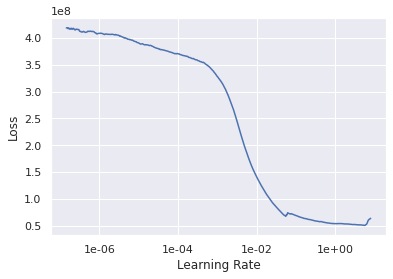

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,1236066.375000,1094631.375000,689.156433,08:04
1,1287462.500000,1758089.125000,963.325623,08:24
2,819931.375000,1110531.500000,690.685059,08:57
3,521110.625000,801055.437500,590.914917,09:32
4,399215.187500,793203.125000,587.023560,09:37


In [ ]:
learn.save('stage1')

In [ ]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,mean_absolute_error,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


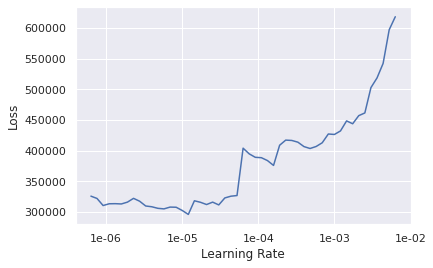

In [ ]:
learn.recorder.plot()

In [ ]:
lr2= 1e-6
learn.fit_one_cycle(5, slice(lr2))

epoch,train_loss,valid_loss,mean_absolute_error,time
0,423643.250000,820633.437500,597.929871,08:08


In [ ]:
learn.save('stage2')

## 5.3 Interference

In [ ]:
learn.load('stage2')

In [ ]:
#### 3.4 Predictions

test_preds = learn.get_preds(DatasetType.Test)
test_preds[0].data

In [ ]:

test_df['Sales'] = test_preds[0].data.numpy().T[0]
test_df[['Id', 'Sales']] = test_df[['Id', 'Sales']].astype(int)

test_df.Sales.dtype


In [ ]:
test_df[["Id", "Sales"]].to_csv("rossmann_submission.csv", index=False)


## 5.4 Submission to Kaggle

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# !pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions list
# !kaggle competitions download -c [COMPETITION]
# !kaggle competitions submit -c [COMPETITION] -f [FILE] -m [MESSAGE]

# !kaggle datasets list -s [KEYWORD]
# !kaggle datasets download -d [DATASET

In [ ]:
!kaggle competitions submit -c rossmann-store-sales -f rossmann_submission.csv -m "Late submit, testing"